# Introduction to Deep Learning (Tensorflow graphs and sessions)

Deep learning can be understood as a subset of Machine learning. It's probably the most popular term in the Machine learning world today due to the unimaginable results it produced recently. Deep learning is nothing but same old neural networks with more hidden layers and better activations, optimizations and some novel techniques.

Before moving on to the nuts and bolts let's understand couple of tools and concepts that will be useful.

## Tensorflow

tensorflow is a great numerical computing library which can be used to develop neural networks.

In [1]:
import tensorflow as tf

In [14]:
a = tf.constant("hello world")
print(a)

Tensor("Const:0", shape=(), dtype=string)


In [15]:
with tf.Session() as sess:
    print(sess.run(a))

b'hello world'


### Let's talk about Graphs

In [16]:
pi = tf.constant(3.14, name="pi")
r = tf.placeholder(tf.float32, name="r")
    
y = pi * r * r

in Tensorflow, it will first create a graph with tensors and operations and execution of the graph happens in a session.

In [17]:
# We write the graph out to the 'logs' directory
tf.summary.FileWriter("logs", sess.graph).close()

In [18]:
with tf.Session() as sess:
    print(y.eval(feed_dict={r: [5]}))

[78.5]


Let's create a graph for a neural network with 3 layers.

In [19]:
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, name="X")
    
    W1 = tf.placeholder(tf.float32, name="W1")
    b1 = tf.placeholder(tf.float32, name="b1")
    
    a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    W2 = tf.placeholder(tf.float32, name="W2")
    b2 = tf.placeholder(tf.float32, name="b2")
    
    a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)

    W3 = tf.placeholder(tf.float32, name="W3")
    b3 = tf.placeholder(tf.float32, name="b3")
    
    y_hat = tf.matmul(a2, W3) + b3
    
tf.summary.FileWriter("logs", g).close()

In [ ]:
# Run this in terminal
!tensorboard --logdir=logs

You will see an output like this:
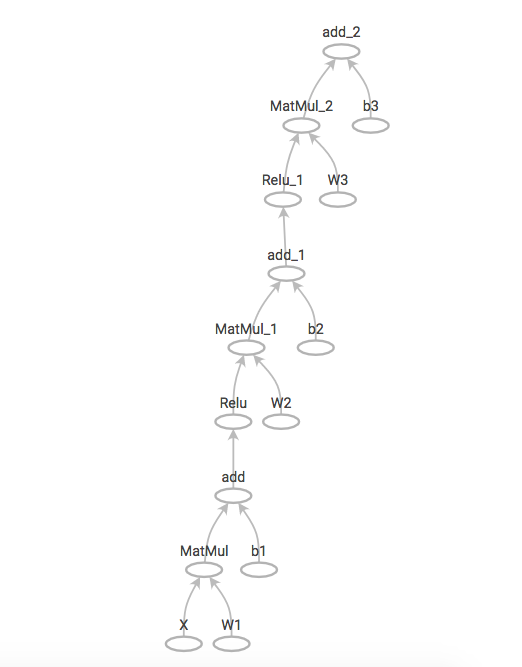